In [1]:
from typing import TypedDict, Type, Any, Callable

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from spark.config import views
from spark.create_session import create_session

from IPython.display import display

from fitter import Fitter, get_common_distributions

In [2]:
VIEWS = views("v3")
spark = create_session()

for view, file in VIEWS.items():
    df = spark.read.json(file)
    df.createOrReplaceTempView(view)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/25 20:05:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
dfs = dict((zip(VIEWS.keys(), [spark.sql(f"SELECT * FROM {view}") for view in VIEWS.keys()])))

In [4]:
for view, df in dfs.items():
    print(view)
    display(df.toPandas())


artists


,genres,id,name
0,"[country rap, lgbtq+ hip hop, pop rap, queer c...",7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X
1,"[dance pop, edm, pop dance, pop house, tropica...",0xRXCcSX89eobfrshSVdyu,MEDUZA
2,[speedrun],3OKg7YbOIatODzkRIbLJR4,TheFatRat
3,"[desi pop, filmi, modern bollywood]",4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi
4,[nz pop],56mfhUDKa1vec6rSLZV5Eg,Jawsh 685
...,...,...,...
1662,"[pop r&b, r&b, trap queen, viral rap]",6AMd49uBDJfhf30Ak2QR5s,Coi Leray
1663,"[escape room, indie soul, lgbtq+ hip hop]",6qgnBH6iDM91ipVXv28OMu,KAYTRANADA
1664,"[contemporary country, country, country road, ...",5q8HGNo0BjLWaTAhRtbwxa,Brantley Gilbert
1665,"[ambient worship, ccm, christian music, deep c...",26T4yOaOoFJvUvxR87Y9HO,Bethel Music


sessions


,event_type,session_id,timestamp,track_id,user_id
0,play,124,2023-09-20T07:18:17,4flBNxpPLGVAdufOzRBIen,101
1,like,124,2023-09-20T07:18:30.069000,4flBNxpPLGVAdufOzRBIen,101
2,play,125,2023-04-27T00:20:57.181000,3uMYq07Kj5m564OQwdSCrD,101
3,play,126,2023-02-11T05:34:54.160000,2RChe0r2cMoyOvuKobZy44,101
4,advertisment,126,2023-02-11T05:34:56.685000,None,101
...,...,...,...,...,...
580241,like,102015,2023-11-12T09:06:01.022000,4cLdpErILMO8Db8pQVAVcZ,1100
580242,play,102015,2023-11-12T09:09:17.564000,3j8ja2Hq824OaRqIENJPTH,1100
580243,like,102015,2023-11-12T09:12:19.739000,3j8ja2Hq824OaRqIENJPTH,1100
580244,skip,102015,2023-11-12T09:12:58.093000,3j8ja2Hq824OaRqIENJPTH,1100


track_storage


,daily_cost,storage_class,track_id
0,0.010073,slow,0RNxWy0PC3AyH4ThH3aGK6
1,0.009900,slow,2W889aLIKxULEefrleFBFI
2,0.009950,slow,4Pnzw1nLOpDNV6MKI5ueIR
3,0.008150,slow,7GLmfKOe5BfOXk7334DoKt
4,0.009309,slow,6kD1SNGPkfX9LwaGd1FG92
...,...,...,...
22407,0.010749,slow,0LcNMuOiULmxJK3bdHTfDF
22408,0.009940,slow,1uviKYHZuM4uINK33F7sCt
22409,0.009793,slow,1fXmDeiCb3ABt5CzkMxp4u
22410,0.010118,slow,27kcZEJvhkb1rzZS9gCpdA


tracks


,acousticness,danceability,duration_ms,energy,explicit,id,id_artist,instrumentalness,key,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence
0,0.5860,0.673,201467,0.3770,0,0RNxWy0PC3AyH4ThH3aGK6,19eLuQmk9aCobbVDHc6eek,0.000000,0,0.3320,-14.141,Mack the Knife,55,1929,0.0697,88.973,0.7130
1,0.9470,0.204,198000,0.1510,0,2W889aLIKxULEefrleFBFI,1Mxqyy3pSjf8kZZL4QVxS0,0.000009,2,0.3210,-17.842,Someone to Watch Over Me,54,1943,0.0418,91.783,0.1340
2,0.9840,0.295,199000,0.0826,0,4Pnzw1nLOpDNV6MKI5ueIR,1Mxqyy3pSjf8kZZL4QVxS0,0.000358,1,0.1560,-19.569,Nancy (With the Laughing Face) - 78rpm Version,55,1944,0.0367,128.600,0.1690
3,0.8400,0.561,163000,0.3350,0,7GLmfKOe5BfOXk7334DoKt,1Mxqyy3pSjf8kZZL4QVxS0,0.000002,9,0.7880,-11.093,Saturday Night (Is The Loneliest Night In The ...,54,1944,0.0499,126.974,0.5900
4,0.9500,0.197,186173,0.0546,0,6kD1SNGPkfX9LwaGd1FG92,1Mxqyy3pSjf8kZZL4QVxS0,0.276000,1,0.1520,-22.411,Put Your Dreams Away (For Another Day),53,1944,0.0346,90.150,0.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0.1680,0.537,214987,0.6470,0,0LcNMuOiULmxJK3bdHTfDF,7gAppWoH7pcYmphCVTXkzs,0.000000,2,0.1080,-7.370,Missing You,65,2019-04-19,0.0519,79.770,0.5310
22408,0.8450,0.493,198799,0.4610,0,1uviKYHZuM4uINK33F7sCt,7okSU80WTrn4LXlyXYbX3P,0.000000,2,0.1150,-8.524,Fix It to Break It,70,2020-03-27,0.0456,51.414,0.3500
22409,0.0119,0.578,195868,0.7400,0,1fXmDeiCb3ABt5CzkMxp4u,2jnIB6XdLvnJUeNTy5A0J2,0.000000,2,0.1800,-5.080,Lotus Inn,63,2020-12-04,0.0721,155.984,0.4950
22410,0.6180,0.590,202355,0.4430,0,27kcZEJvhkb1rzZS9gCpdA,7okSU80WTrn4LXlyXYbX3P,0.000000,0,0.1100,-5.662,remember the mornings,67,2020-11-27,0.0722,149.447,0.3420


users


,city,favourite_genres,name,premium_user,street,user_id
0,Wrocław,"[dance pop, latin, hard rock]",Dominik Paździora,False,aleja Jabłoniowa 55/02,101
1,Poznań,"[reggaeton, latin arena pop, modern rock]",Justyna Mszyca,False,ul. Krótka 710,102
2,Gdynia,"[rap, art rock, rock]",Kornelia Witka,False,al. Kościuszki 587,103
3,Gdynia,"[mexican pop, contemporary country, psychedeli...",Jędrzej Kotala,False,pl. Kossaka 97/86,104
4,Kraków,"[rock, adult standards, permanent wave]",Karol Kleban,False,ul. Tulipanowa 861,105
...,...,...,...,...,...,...
995,Radom,"[psychedelic rock, pop urbaine, alternative rock]",Witold Podeszwa,True,pl. Ściegiennego 71/30,1096
996,Szczecin,"[album rock, alternative rock, pop punk]",Emil Brodawka,True,ulica Toruńska 71,1097
997,Gdynia,"[hard rock, alternative rock, regional mexican]",Anastazja Frydel,False,al. Plażowa 25,1098
998,Szczecin,"[modern rock, adult standards, electropop]",Anastazja Szmurło,True,plac Przechodnia 13,1099


In [5]:
class ColumnSummary(TypedDict):
    dtype: Type
    is_unique: bool
    mode: Any
    share_mode: float
    num_nulls: int
    share_nulls: float
    num_nans: int
    share_nans: float
    min: Any
    max: Any
    
def _exception_wrapper(f: Callable):
    try:
        return f()
    except Exception as e:
        return e
        
    
def get_column_summary(column: pd.Series) -> ColumnSummary:
    return ColumnSummary(
        dtype=_exception_wrapper(lambda: getattr(column, "dtype")),
        is_unique=_exception_wrapper(lambda: getattr(column, "is_unique")),
        mode=_exception_wrapper(lambda: np.concatenate(pd.DataFrame(column).mode(dropna=False).values)),
        share_mode=_exception_wrapper(lambda: column.isin(np.concatenate(pd.DataFrame(column).mode(dropna=False).values)).sum() / column.size),
        num_nulls=_exception_wrapper(column.isnull().sum),
        share_nulls=_exception_wrapper(lambda: column.isnull().sum() / column.size),
        num_nans=_exception_wrapper(column.isna().sum),
        share_nans=_exception_wrapper(lambda: column.isna().sum() / column.size),
        min=_exception_wrapper(column.min),
        max=_exception_wrapper(column.max)
    )

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,6.261744e-13,5181.085604,5205.137660,inf,0.048775,8.930357e-47
norm,2.969720e-12,47374.142702,47390.177406,inf,0.109436,3.211104e-234
cauchy,4.230035e-12,1900.635513,1916.670217,inf,0.079271,6.021396e-123


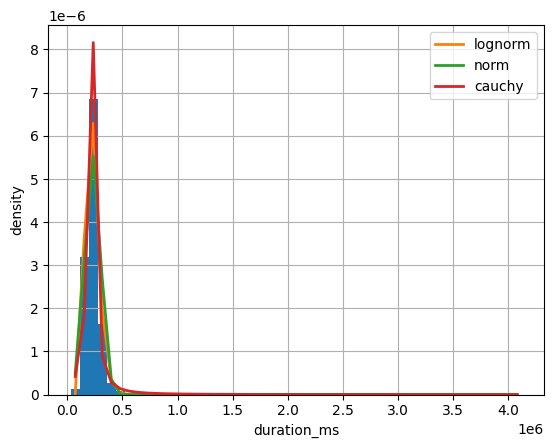

In [6]:
# FOR NUMERIC DATA

TABLE = 'tracks'
COLUMN = 'duration_ms'

data = dfs[TABLE].toPandas()[COLUMN]

f = Fitter(data, distributions=get_common_distributions(), xmin=data.min(), xmax=data.max(), bins=50, density=True)
f.fit()
display(f.summary(Nbest=3))

axes = plt.gca()
axes.set_xlabel(COLUMN)
axes.set_ylabel("density")

plt.show()

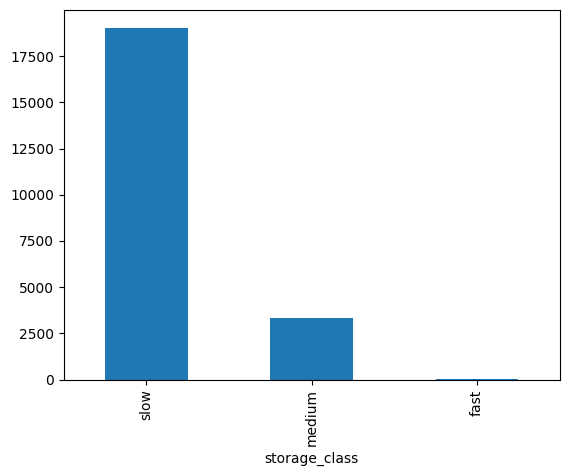

In [7]:
# FOR NON-NUMERIC DATA

TABLE = 'track_storage'
COLUMN = 'storage_class'

data = dfs[TABLE].toPandas()[COLUMN]

pd.DataFrame(data)[COLUMN].value_counts(dropna=False).plot.bar()
plt.show()


In [8]:
summary_dfs = []

for view, df in dfs.items():
    column_names = pd.Series(dfs[view].toPandas().columns.values, name="column_name").apply(lambda name: f"{view}.{name}")
    column_summaries = pd.DataFrame.from_records(df.toPandas().apply(get_column_summary))
    s_df = pd.concat((column_names, column_summaries), axis=1)
    s_df.set_index("column_name")
    summary_dfs.append(s_df)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.concat(summary_dfs).set_index("column_name"))

,dtype,is_unique,mode,share_mode,num_nulls,share_nulls,num_nans,share_nans,min,max
column_name,,,,,,,,,,
artists.genres,object,unhashable type: 'numpy.ndarray',[[german hip hop]],0.006599,0,0.000000,0,0.000000,operands could not be broadcast together with ...,operands could not be broadcast together with ...
artists.id,object,True,"[003f4bk13c6Q3gAUXv7dGJ, 007FXgr0jLBJxhPJjacXQ...",1.0,0,0.000000,0,0.000000,003f4bk13c6Q3gAUXv7dGJ,7zxFc10N9BP2lg73b8cwZ0
artists.name,object,True,"[$NOT, $uicideboy$, (G)I-DLE, *NSYNC, 2 Chainz...",1.0,0,0.000000,0,0.000000,$NOT,優里
sessions.event_type,object,False,[play],0.554408,0,0.000000,0,0.000000,advertisment,skip
sessions.session_id,int64,False,[92128],0.000115,0,0.000000,0,0.000000,124,102015
sessions.timestamp,object,False,"[2023-02-15T03:44:21.506000, 2023-02-15T10:29:...",0.000041,0,0.000000,0,0.000000,2022-11-30T03:53:28.160000,2023-11-30T09:39:05.045000
sessions.track_id,object,False,[None],0.133078,77218,0.133078,77218,0.133078,'<=' not supported between instances of 'str' ...,'>=' not supported between instances of 'str' ...
sessions.user_id,int64,False,[1072],0.002275,0,0.000000,0,0.000000,101,1100
track_storage.daily_cost,float64,False,"[0.0106, 0.01179]",0.000982,0,0.000000,0,0.000000,0.001531,0.206013
